# Input de dados - ic_tipo_renda  
### Desenvolvimento de modelos visando a inferência de valores em variáveis contendo `NaN` (nulo)
- Variáveis:
    - ic_sexo
    - ic_tipo_renda
    - ic_infmo_renda
    - dt_apuracao_renda

In [1]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
from IPython.display import Image
%matplotlib inline
pd.set_option('display.max_columns', None)

In [3]:
# Ler o arquivo
# Resultado do 01.1_tratamento_filtros_dados_renda.ipynb
df_renda = pd.read_csv("../../../dados/amostra_sicli_tratada/cli_renda_amostra_regras_tratamento.csv", sep=';')
df_renda.shape

(2382027, 13)

In [4]:
df_renda.columns

Index(['nu_pessoa', 'dt_nascimento', 'ic_tipo_renda', 'vr_renda_bruta',
       'vr_renda_liquida', 'ic_infmo_renda', 'dt_apuracao_renda', 'ic_sexo',
       'ic_situacao', 'ic_inconsistencia', 'nu_estdo_civil_p27', 'idade',
       'valido'],
      dtype='object')

In [5]:
# Definição das features (inputs) e label (target)
# features e label ic_tipo_renda
features_tp_renda = ['vr_renda_bruta', 'vr_renda_liquida', #'dt_nascimento', 
            'ic_infmo_renda', 'dt_apuracao_renda', 'ic_sexo',
            'ic_situacao', 'nu_estdo_civil_p27', 'idade']
label_tp_renda    = ['ic_tipo_renda']

 ### Quantitativo de dados válidos e inválidos

In [6]:
df_validos   = df_renda[df_renda['valido'] == True]
df_invalidos = df_renda[df_renda['valido'] == False]

print('Válidos:   ', df_validos.shape)
print('Inválidos: ', df_invalidos.shape)

Válidos:    (1221998, 13)
Inválidos:  (1160029, 13)


# ic_sexo

In [7]:
print('Válidos:')
print(df_validos['ic_sexo'].value_counts())
print('Inválidos:')
print(df_invalidos['ic_sexo'].value_counts())

Válidos:
M    617715
F    603686
?       597
Name: ic_sexo, dtype: int64
Inválidos:
M    629606
F    526174
?      4249
Name: ic_sexo, dtype: int64


### Inconsistências em ic_sexo
- `? = 597` nos registros válidos
- `? = 4249` nos registros inválidos
- Total: `4846` inválidos
- Serão separados os registros em dois conjuntos de dados
    - df_ic_sexo_treino contendo os `M` e `F` válidos que serão usados para treino e validação.
    - df_ic_sexo_inferir contendo os `4846` registros que serão inferidos pelo modelo treinado.

In [8]:
# registros consistentes
df_ic_sexo_treino  = df_validos[df_validos['ic_sexo'] != '?']

# df_renda será usado porque existem registros INCONSISTENTES de
# ic_sexo em ambos datasets (válidos e inválidos)
df_ic_sexo_inferir = df_renda[df_renda['ic_sexo'] == '?']
print('Treino:  ', df_ic_sexo_treino.shape)
print('Inferir: ', df_ic_sexo_inferir.shape)

Treino:   (1221401, 13)
Inferir:  (4846, 13)


# ic_tipo_renda

In [9]:
print('Válidos:')
print(df_validos['ic_tipo_renda'].value_counts())
print('Inválidos:')
print(df_invalidos['ic_tipo_renda'].value_counts())

Válidos:
F    729319
I    492679
Name: ic_tipo_renda, dtype: int64
Inválidos:
?    658335
F    398215
I    103479
Name: ic_tipo_renda, dtype: int64


### Inconsistências em ic_tipo_renda
- `? = 658335` registros inválidos
- Serão separados os registros em dois conjuntos de dados
    - df_ic_tipo_renda_treino contendo os `F` e `I` válidos que serão usados para treino e validação.
    - df_ic_tipo_renda_inferir contendo os `658335` registros que serão inferidos pelo modelo treinado.

In [10]:
# registros consistentes
df_ic_tipo_renda_treino  = df_validos

# registros INCONSISTENTES
df_ic_tipo_renda_inferir = df_invalidos[df_invalidos['ic_tipo_renda'] == '?']
print('Treino:  ', df_ic_tipo_renda_treino.shape)
print('Inferir: ', df_ic_tipo_renda_inferir.shape)

Treino:   (1221998, 13)
Inferir:  (658335, 13)


# ic_infmo_renda

In [11]:
print('Válidos:')
print(df_validos['ic_infmo_renda'].value_counts())
print('Inválidos:')
print(df_invalidos['ic_infmo_renda'].value_counts())

Válidos:
2.0    538634
6.0    344764
3.0    292274
5.0     46326
Name: ic_infmo_renda, dtype: int64
Inválidos:
0.0    658335
5.0    221813
3.0    106344
6.0     92123
2.0     81414
Name: ic_infmo_renda, dtype: int64


### Inconsistências em ic_infmo_renda
- `0.0 = 658335` registros inválidos
- Serão separados os registros em dois conjuntos de dados
    - df_ic_infmo_renda_treino contendo os registros válidos que serão usados para treino e validação.
    - df_ic_infmo_renda_inferir contendo os `658335` registros que serão inferidos pelo modelo treinado.

In [12]:
# registros consistentes
df_ic_infmo_renda_treino  = df_validos

# registros INCONSISTENTES
df_ic_infmo_renda_inferir = df_invalidos[df_invalidos['ic_infmo_renda'] == 0]
print('Treino:  ', df_ic_infmo_renda_treino.shape)
print('Inferir: ', df_ic_infmo_renda_inferir.shape)

Treino:   (1221998, 13)
Inferir:  (658335, 13)


# dt_apuracao_renda

In [13]:
print('Válidos:')
print((df_validos['dt_apuracao_renda'] == 0).value_counts())
print('Inválidos:')
print((df_invalidos['dt_apuracao_renda'] == 0).value_counts())

Válidos:
False    1221998
Name: dt_apuracao_renda, dtype: int64
Inválidos:
True     767164
False    392865
Name: dt_apuracao_renda, dtype: int64


### Inconsistências em dt_apuracao_renda
- Em **Inválidos** `True = 767164` são registros **inconsistentes**, no caso sem dt_apuracao_renda
- Serão separados os registros em dois conjuntos de dados
    - df_dt_apuracao_renda_treino contendo os registros válidos que serão usados para treino e validação.
    - df_dt_apuracao_renda_inferir contendo os `767164` registros que serão inferidos pelo modelo treinado.

In [14]:
df_features = df_dt_apuracao_renda[features_dt_apuracao]
df_label    = df_dt_apuracao_renda[label_dt_apuracao]

print(df_features.shape)
print(df_label.shape)

(1221998, 8)
(1221998, 1)


In [15]:
df_features

,vr_renda_bruta,vr_renda_liquida,ic_infmo_renda,dt_apuracao_renda,ic_sexo,ic_situacao,nu_estdo_civil_p27,idade
0,0.00,0.00,2.0,201710,F,1,9,66
1,975.00,897.00,6.0,201709,M,1,9,34
2,1530.00,1407.60,6.0,201709,M,1,9,34
3,0.00,0.00,2.0,201511,M,1,9,52
4,0.00,0.00,2.0,201702,F,1,1,47
...,...,...,...,...,...,...,...,...
1221993,0.00,0.00,2.0,201412,M,1,1,24
1221994,0.00,0.00,2.0,201603,F,1,9,53
1221995,978.58,978.58,6.0,201509,F,1,9,55
1221996,788.00,788.00,3.0,201510,M,1,1,29


# Gera amostragem conforme a calculadora:  
- https://www.solvis.com.br/calculos-de-amostragem/  

- **Calculadora 2**
    - População: 1.741.828
    - Margem de erro (%): 1
    - Confiabilidade (%): 99
    - Tamanho da Amostra: 16419
        - Será usada aproximadamente a metade dessa proporção por questões de tempo computacional.

In [16]:
# Amostra extratificada
from sklearn.model_selection import train_test_split

X, y = df_features[features_tp_renda], df_label[label_tp_renda]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.007, #0.013441941, 
                                                    random_state=84,
                                                    shuffle=True) # Faz embaralhamento deixando a aleatoriedade ainda maior
                                                    #stratify=y) 
                                                    # y = df_label[[label_tp_renda]

del X_train
del y_train

#print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(8554, 8) (8554, 1)


#### `X` e `y` correspondem as variáveis independentes e dependente, respectivamente.

In [17]:
X = X_test
y = y_test

del X_test, y_test

print(X.shape,y.shape)

(8554, 8) (8554, 1)


Essa amostra será dividida no conjunto de dados para o `treino` e `teste`

## Quantitativo por variáveis categóricas

In [18]:
print('ic_tipo_renda:')
print(y['ic_tipo_renda'].value_counts())

print('ic_sexo:')
print(X['ic_sexo'].value_counts())

print('ic_infmo_renda:')
print(X['ic_infmo_renda'].value_counts())

ic_tipo_renda:
F    5135
I    3419
Name: ic_tipo_renda, dtype: int64
ic_sexo:
F    4285
M    4264
?       5
Name: ic_sexo, dtype: int64
ic_infmo_renda:
2.0    3726
6.0    2438
3.0    2077
5.0     313
Name: ic_infmo_renda, dtype: int64


||Variáveis Usadas na Estratificada||
|---|---|---|
|**ic_infmo_renda**|**ic_tipo_renda**|**ic_tipo_renda & ic_infmo_renda**|
|--------------------------|--------------------------|--------------------------|
|**ic_sexo**|**ic_sexo**|**ic_sexo**|
|M - 4331 | **F - 4344** | M - 4420|
|F - 4219 | **M - 4206** | F - 4130|
||||
|**ic_tipo_renda**|**ic_tipo_renda**|**ic_tipo_renda**|
|F - 5180 | **F - 5102** | F - 5101|
|I - 3370 | **I - 3448** | I - 3449|
||||
|**ic_infmo_renda**|**ic_infmo_renda**|**ic_infmo_renda**|
|2.0 - 3769 | **2.0 - 3795** | 2.0 - 3768|
|6.0 - 2412 | **6.0 - 2357** | 6.0 - 2413|
|3.0 - 2045 | **3.0 - 2089** | 3.0 - 2045| 
|5.0 - 324 | **5.0 - 309** | 5.0 - 324| 

- Foi observado que a amostragem estratificada por `ic_tipo_renda` deixou `ic_sexo = F` em maior proporção.
    - Originalmente a maioria é do sexo masculino.
- Isso é interessante porque o desbalaneamento da variável dependente `ic_sexo` está, então, no fato da renda ser formal ou informal.
- Portanto, a estratificação será feita por `ic_tipo_renda`, pois mantem um melhor equilibrio entre `ic_sexo = M` e `ic_sexo = F`.

### Quantidade de registros por ic_tipo_renda

In [19]:
y['ic_tipo_renda'].value_counts()

F    5135
I    3419
Name: ic_tipo_renda, dtype: int64

In [20]:
# Divisão do dataset em porções train e test.
X_train, X_test, y_train, y_test =\
     train_test_split(X, y,
                      test_size=0.33,
                      random_state=42,
                      shuffle=True)
                      #stratify=y)

print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(5731, 8) (5731, 1)
(2823, 8) (2823, 1)


- 11000 amostras para o treinamento dos modelos
- 5419 amostras para a validação da acurácia dos modelos

# Transforma em números (encoding) as variáveis categóricas

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# aplica no y_train
### label = ic_sexo ###
###################################
### ic_sexo 1 = M e 0 = F ###
###################################
le = le.fit(X_train['ic_sexo'])
X_train['ic_sexo'] = le.transform(X_train['ic_sexo'])

# aplica no y_test
le = le.fit(X_test['ic_sexo'])
X_test['ic_sexo'] = le.transform(X_test['ic_sexo'])

### encoding das variáveis categóricas ###
###################################
### ic_tipo_renda 0 = F e 1 = I ###
###################################
# aplica no X_train
le = le.fit(y_train['ic_tipo_renda'])
y_train['ic_tipo_renda'] = le.transform(y_train['ic_tipo_renda'])

# aplica no X_test
le = le.fit(y_test['ic_tipo_renda'])
y_test['ic_tipo_renda'] = le.transform(y_test['ic_tipo_renda'])
###################################

#print(y_train.ic_sexo.value_counts())

/home/marcello/anaconda3/envs/av/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/home/marcello/anaconda3/envs/av/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/marcello/anaconda3/envs/av/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

## Bibliotecas usadas na preparação, treinamento e na validação

In [22]:
from matplotlib import pyplot
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

# Aprendizado Supervisionado - Classificação

### Algoritmos de Classificação

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

### Parâmetros de configuração da validação por KFold

Definição de quantidade de folds, definição da seed a ser utilizada, e definição da métrica de avaliação. K-fold é um método de treinamento a ser usado em conjuntos de dados de tamanho moderado devido ao seu treinamento consumir bastante tempo.  

Referência: 
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html, https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html

In [24]:
num_folds = 10
seed = 42
scoring = 'accuracy'

# Pipeline de avaliação de desempenho de algoritmos  
### Classificação Supervisionada

In [25]:
# Verificação do score de cada algoritmo. Avaliação de desempenho de cada modelo.
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier(n_jobs=-1)))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier(max_depth=2, random_state=0, n_jobs=-1)))
#models.append(('SVM', LinearSVC()))
models.append(('SVM', SVC(kernel='rbf', gamma=0.7, C=0.2)))
models.append(('ADT', AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                                         algorithm="SAMME",
                                         n_estimators=200)))

results = []
names = []
for name, model in models:
	kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring, n_jobs=-1)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.815042 (0.013774)
LDA: 0.769849 (0.012438)
KNN: 0.988135 (0.004468)
CART: 0.997208 (0.001599)
NB: 0.811551 (0.013649)
RF: 0.953762 (0.008370)
SVM: 0.626066 (0.012169)
ADT: 0.996510 (0.002589)


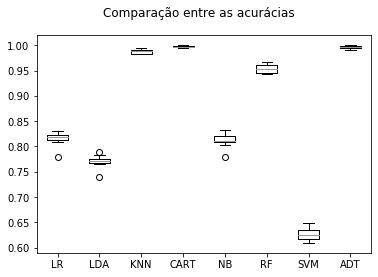

In [26]:
# Visualização das acurácias dos diferentes modelos.
fig = pyplot.figure()
fig.suptitle('Comparação entre as acurácias')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [27]:
# Padronização do dataset, utilizando StandardScaler
# Aplica normalização por z-score
pipelines = []
pipelines.append(('LR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression(solver='liblinear'))])))
pipelines.append(('LDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('KNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier(n_jobs=-1))])))
pipelines.append(('CART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('NB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('RF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestClassifier(max_depth=2, 
                                                                                             random_state=0, 
                                                                                             n_jobs=-1))])))
#pipelines.append(('SVM', Pipeline([('Scaler', StandardScaler()),('SVM', LinearSVC())])))
pipelines.append(('SVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC(kernel='rbf', 
                                                                            gamma=0.7, 
                                                                            C=0.2))])))
pipelines.append(('ADT', Pipeline([('Scaler', StandardScaler()),('ADT', AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                                                                                           algorithm="SAMME",
                                                                                           n_estimators=200))])))
results = []
names = []
for name, model in pipelines:
	kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring, n_jobs=-1)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.908745 (0.012636)
LDA: 0.769849 (0.012438)
KNN: 0.950447 (0.006524)
CART: 0.996685 (0.001981)
NB: 0.811551 (0.013649)
RF: 0.953762 (0.008370)
SVM: 0.941373 (0.009678)
ADT: 0.996510 (0.002589)


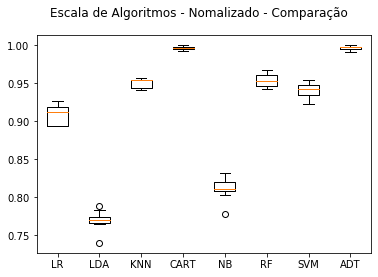

In [28]:
# Visualização das acurácias dos diferentes modelos pós-normalização do dataset.
fig = pyplot.figure()
fig.suptitle('Escala de Algoritmos - Nomalizado - Comparação')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [29]:
stop

NameError: name 'stop' is not defined

# Otimização de parâmetros dos modelos selecionados
- KNN
- AdaBoost CART
- Logistic Regression

# KNN

In [30]:
# Ajuste de parâmetros do modelo KNN. Tuning
#scaler = StandardScaler().fit(X_train)
#rescaledX = scaler.transform(X_train)

neighbors = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
param_grid = dict(n_neighbors=neighbors)

model = KNeighborsClassifier(n_jobs=-1)

kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold, n_jobs=-1)

#grid_result = grid.fit(rescaledX, y_train)
grid_result = grid.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.989707 using {'n_neighbors': 4}
0.987264 (0.005459) with: {'n_neighbors': 1}
0.986392 (0.005555) with: {'n_neighbors': 2}
0.989008 (0.004812) with: {'n_neighbors': 3}
0.989707 (0.004770) with: {'n_neighbors': 4}
0.988135 (0.004468) with: {'n_neighbors': 5}
0.989008 (0.004484) with: {'n_neighbors': 6}
0.988484 (0.003992) with: {'n_neighbors': 7}
0.988833 (0.004758) with: {'n_neighbors': 8}
0.987961 (0.004709) with: {'n_neighbors': 9}
0.988833 (0.005127) with: {'n_neighbors': 10}
0.986740 (0.004820) with: {'n_neighbors': 11}
0.987961 (0.004645) with: {'n_neighbors': 12}
0.986216 (0.004643) with: {'n_neighbors': 13}
0.987438 (0.004328) with: {'n_neighbors': 14}
0.985693 (0.004857) with: {'n_neighbors': 15}


/home/marcello/anaconda3/envs/av/lib/python3.6/site-packages/sklearn/model_selection/_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


# AdaBoost(CART)

In [31]:
# Ajuste de parâmetros do modelo ADT - AdaBoost Decison Tree Tuning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

n_estimators = [250, 255, 260, 265, 270]
learning_rate = [0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6]
algorithm = ['SAMME', 'SAMME.R']
param_grid = dict(n_estimators=n_estimators, learning_rate=learning_rate, algorithm=algorithm)

model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1))

kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold, n_jobs=-1)

grid_result = grid.fit(rescaledX, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/home/marcello/anaconda3/envs/av/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Best: 0.997557 using {'algorithm': 'SAMME.R', 'learning_rate': 0.53, 'n_estimators': 250}
0.996684 (0.002641) with: {'algorithm': 'SAMME', 'learning_rate': 0.5, 'n_estimators': 250}
0.996684 (0.002641) with: {'algorithm': 'SAMME', 'learning_rate': 0.5, 'n_estimators': 255}
0.996684 (0.002641) with: {'algorithm': 'SAMME', 'learning_rate': 0.5, 'n_estimators': 260}
0.996684 (0.002641) with: {'algorithm': 'SAMME', 'learning_rate': 0.5, 'n_estimators': 265}
0.996510 (0.002589) with: {'algorithm': 'SAMME', 'learning_rate': 0.5, 'n_estimators': 270}
0.996684 (0.002641) with: {'algorithm': 'SAMME', 'learning_rate': 0.51, 'n_estimators': 250}
0.996684 (0.002641) with: {'algorithm': 'SAMME', 'learning_rate': 0.51, 'n_estimators': 255}
0.996684 (0.002641) with: {'algorithm': 'SAMME', 'learning_rate': 0.51, 'n_estimators': 260}
0.996161 (0.002565) with: {'algorithm': 'SAMME', 'learning_rate': 0.51, 'n_estimators': 265}
0.996510 (0.002589) with: {'algorithm': 'SAMME', 'learning_rate': 0.51, 'n_est

# Logistic Regression

In [32]:
# Ajuste de parâmetros do modelo Logistic Regression Tuning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

solver = ['newton-cg','lbfgs','liblinear','sag','saga']

param_grid = dict(solver=solver)

model = LogisticRegression()

kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold, n_jobs=-1)

#grid_result = grid.fit(X_train, y_train)
grid_result = grid.fit(rescaledX, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.912060 using {'solver': 'newton-cg'}
0.912060 (0.013835) with: {'solver': 'newton-cg'}
0.912060 (0.013835) with: {'solver': 'lbfgs'}
0.908919 (0.012362) with: {'solver': 'liblinear'}
0.895308 (0.017192) with: {'solver': 'sag'}
0.870531 (0.019224) with: {'solver': 'saga'}


/home/marcello/anaconda3/envs/av/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [ ]:
#STOP

# Amostragem de 30%
- Essa amostragem será usada nos modelos que apresentam os melhores resultados
- Os modelos serão configurados com os melhores parâmetros após otimização

In [33]:
df_features = df_ic_tipo_renda_treino[features_tp_renda]
df_label    = df_ic_tipo_renda_treino[label_tp_renda]

print(df_features.shape)
print(df_label.shape)

(1221998, 8)
(1221998, 1)


In [34]:
from sklearn.model_selection import train_test_split

X, y = df_features[features_tp_renda], df_label['ic_tipo_renda']
X_train, X_test, y_train, y_test =\
     train_test_split(X, y,
                      test_size=0.3, ## -> 30% será usado para treinar e avaliar
                      random_state=16, # valor das sementes diferente para forçar outra aleatoriedade 
                      shuffle=True) # Faz embaralhamento deixando a aleatoriedade ainda maior
                      #random_state=33,
                      #stratify=df_label['ic_tipo_renda'])

X = X_test
y = y_test

del X_train, y_train, X_test, y_test

print (X.shape, y.shape)

(366600, 8) (366600,)


# Separar dados de treino e validação

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =\
     train_test_split(X, y,
                      #test_size=0.15, # 15% será usado para avaliar
                      test_size=0.3, # 30% será usado para avaliar
                      random_state=51, # valor das sementes diferente para forçar outra aleatoriedade 
                      shuffle=True) # Faz embaralhamento deixando a aleatoriedade ainda maior
                      #random_state=51, 
                      #stratify=y)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

print(y_train.value_counts())
print(X_train['ic_sexo'].value_counts())

(256620, 8) (256620,)
(109980, 8) (109980,)
F    153491
I    103129
Name: ic_tipo_renda, dtype: int64
M    130047
F    126453
?       120
Name: ic_sexo, dtype: int64


# Encoding

In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# aplica no y_train
### label = ic_sexo ###
###################################
### ic_sexo 1 = M e 0 = F ###
###################################
le = le.fit(X_train['ic_sexo'])
X_train['ic_sexo'] = le.transform(X_train['ic_sexo'])

# aplica no y_test
le = le.fit(X_test['ic_sexo'])
X_test['ic_sexo'] = le.transform(X_test['ic_sexo'])

### encoding das variáveis categóricas ###
###################################
### ic_tipo_renda 0 = F e 1 = I ###
###################################
# aplica no X_train
le = le.fit(y_train)
y_train = le.transform(y_train)

# aplica no X_test
le = le.fit(y_test)
y_test = le.transform(y_test)
###################################

#print(y_train.ic_sexo.value_counts())

/home/marcello/anaconda3/envs/av/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/home/marcello/anaconda3/envs/av/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [37]:
print('qtd 0 = F: ',(y_train == 0).sum())
print('qtd 1 = I: ',(y_train == 1).sum())

qtd 0 = F:  153491
qtd 1 = I:  103129


# Resample

In [38]:
'''#from imblearn.combine import SMOTEENN
#undersample = SMOTEENN(n_jobs=-1)

from imblearn.combine import SMOTETomek
undersample = SMOTETomek(n_jobs=-1)

X_train, y_train = undersample.fit_resample(X_train, y_train)
X_test, y_test = undersample.fit_resample(X_test, y_test)

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)'''

'#from imblearn.combine import SMOTEENN\n#undersample = SMOTEENN(n_jobs=-1)\n\nfrom imblearn.combine import SMOTETomek\nundersample = SMOTETomek(n_jobs=-1)\n\nX_train, y_train = undersample.fit_resample(X_train, y_train)\nX_test, y_test = undersample.fit_resample(X_test, y_test)\n\nprint(X_train.shape)\nprint(y_train.shape)\n\nprint(X_test.shape)\nprint(y_test.shape)'

# Modelos
- KNN
- AdaBoost(CART)
- Naïve Bayes Gaussian
- Logistic Regression
- XGBoost

# KNN

In [39]:
# Modelo final KNN
# Best: 0.987785 using {'n_neighbors': 6}
# Best: 0.986566 using {'n_neighbors': 7}
# Best: 0.989707 using {'n_neighbors': 4}

#scaler = StandardScaler().fit(X_train)
#rescaledX = scaler.transform(X_train)

model_KNN = KNeighborsClassifier(n_neighbors=4, n_jobs=-1)

#model_KNN.fit(rescaledX, y_train)
model_KNN.fit(X_train, y_train)

# Estima a acurácia no dataset de validação
#rescaledValidationX = scaler.transform(X_test)

#predictions = model_KNN.predict(rescaledValidationX)
predictions = model_KNN.predict(X_test)

print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.9932169485360974
[[65222   469]
 [  277 44012]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     65691
           1       0.99      0.99      0.99     44289

    accuracy                           0.99    109980
   macro avg       0.99      0.99      0.99    109980
weighted avg       0.99      0.99      0.99    109980



# AdaBoost(CART)

In [40]:
# Modelo final AdaBoost Decision Tree Classifier
# Best: 0.998081 using {'algorithm': 'SAMME.R', 'learning_rate': 0.5, 'n_estimators': 250}
# Best: 0.997033 using {'algorithm': 'SAMME', 'learning_rate': 0.5, 'n_estimators': 250}
# Best: 0.997557 using {'algorithm': 'SAMME.R', 'learning_rate': 0.53, 'n_estimators': 250}

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

model_ADT =  AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                                algorithm="SAMME.R",
                                learning_rate=0.53,
                                n_estimators=250)

model_ADT.fit(rescaledX, y_train)

# Estima a acurácia no dataset de validação
rescaledValidationX = scaler.transform(X_test)

predictions = model_ADT.predict(rescaledValidationX)
#predictions = model_RF.predict(X_test)

print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.9960901982178578
[[65555   136]
 [  294 43995]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     65691
           1       1.00      0.99      1.00     44289

    accuracy                           1.00    109980
   macro avg       1.00      1.00      1.00    109980
weighted avg       1.00      1.00      1.00    109980



# Naïve Bayes Gaussian

In [41]:
# Modelo final Naïve Bayes Gaussian Classifier
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

model_NBG =  GaussianNB()

model_NBG.fit(rescaledX, y_train)

# Estima a acurácia no dataset de validação
rescaledValidationX = scaler.transform(X_test)

predictions = model_NBG.predict(rescaledValidationX)

print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.5973086015639207
[[65691     0]
 [44288     1]]
              precision    recall  f1-score   support

           0       0.60      1.00      0.75     65691
           1       1.00      0.00      0.00     44289

    accuracy                           0.60    109980
   macro avg       0.80      0.50      0.37    109980
weighted avg       0.76      0.60      0.45    109980



# Logistic Regression

In [42]:
# Modelo final Logistic Regression Classifier
# Best: 0.828828 using {'solver': 'newton-cg'}
# Best: 0.900021 using {'solver': 'newton-cg'}
# Best: 0.912060 using {'solver': 'newton-cg'}

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

model_LR =  LogisticRegression(solver='newton-cg')

model_LR.fit(rescaledX, y_train)
#model_LR.fit(X_train, y_train)

# Estima a acurácia no dataset de validação
rescaledValidationX = scaler.transform(X_test)

predictions = model_LR.predict(rescaledValidationX)
#predictions = model_LR.predict(X_test)

print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions)) 

0.9110747408619749
[[57165  8526]
 [ 1254 43035]]
              precision    recall  f1-score   support

           0       0.98      0.87      0.92     65691
           1       0.83      0.97      0.90     44289

    accuracy                           0.91    109980
   macro avg       0.91      0.92      0.91    109980
weighted avg       0.92      0.91      0.91    109980



# XGBoost

In [43]:
#######################################
# Execução da GPU na linha de comando #
#       watch -n 1 nvidia-smi         #
#######################################

from xgboost import XGBClassifier
from xgboost import plot_importance
from xgboost import plot_tree
import time

# utilizado para gerar os logs dos erros: merror e mlogloss
eval_set = [(X_train, y_train), (X_test, y_test)]

# métricas de avaliação
eval_metric = ['merror', 'mlogloss']

# Informa a quantidade de classes que serão usadas no treinamento
num_class = 2 #len(y_train.unique())

start = time.time() # inicia o tempo de execução

model_xgb = XGBClassifier(num_class=num_class,
                          objective='multi:softmax', 
                          n_jobs=-1, 
                          nthread=-1, 
                          tree_method='gpu_hist', 
                          gpu_id=-1)

model_xgb = model_xgb.fit(X_train, 
                          y_train, 
                          eval_metric=eval_metric, 
                          eval_set=eval_set, 
                          verbose=True)

elapsed = time.time() - start # informa o tempo de execução


[0]	validation_0-merror:0.00304	validation_0-mlogloss:0.43927	validation_1-merror:0.00315	validation_1-mlogloss:0.43924
[1]	validation_0-merror:0.00307	validation_0-mlogloss:0.29905	validation_1-merror:0.00297	validation_1-mlogloss:0.29903
[2]	validation_0-merror:0.00304	validation_0-mlogloss:0.21072	validation_1-merror:0.00291	validation_1-mlogloss:0.21070
[3]	validation_0-merror:0.00303	validation_0-mlogloss:0.15165	validation_1-merror:0.00291	validation_1-mlogloss:0.15164
[4]	validation_0-merror:0.00297	validation_0-mlogloss:0.11078	validation_1-merror:0.00288	validation_1-mlogloss:0.11079
[5]	validation_0-merror:0.00297	validation_0-mlogloss:0.08192	validation_1-merror:0.00288	validation_1-mlogloss:0.08195
[6]	validation_0-merror:0.00297	validation_0-mlogloss:0.06125	validation_1-merror:0.00288	validation_1-mlogloss:0.06131
[7]	validation_0-merror:0.00293	validation_0-mlogloss:0.04632	validation_1-merror:0.00294	validation_1-mlogloss:0.04641
[8]	validation_0-merror:0.00293	validati

[68]	validation_0-merror:0.00262	validation_0-mlogloss:0.00497	validation_1-merror:0.00301	validation_1-mlogloss:0.00617
[69]	validation_0-merror:0.00259	validation_0-mlogloss:0.00495	validation_1-merror:0.00302	validation_1-mlogloss:0.00618
[70]	validation_0-merror:0.00256	validation_0-mlogloss:0.00494	validation_1-merror:0.00305	validation_1-mlogloss:0.00619
[71]	validation_0-merror:0.00256	validation_0-mlogloss:0.00494	validation_1-merror:0.00305	validation_1-mlogloss:0.00620
[72]	validation_0-merror:0.00256	validation_0-mlogloss:0.00493	validation_1-merror:0.00305	validation_1-mlogloss:0.00620
[73]	validation_0-merror:0.00256	validation_0-mlogloss:0.00493	validation_1-merror:0.00305	validation_1-mlogloss:0.00620
[74]	validation_0-merror:0.00257	validation_0-mlogloss:0.00490	validation_1-merror:0.00303	validation_1-mlogloss:0.00620
[75]	validation_0-merror:0.00257	validation_0-mlogloss:0.00490	validation_1-merror:0.00304	validation_1-mlogloss:0.00620
[76]	validation_0-merror:0.00257

In [44]:
print("GPU tempo de treinamento: %s seconds" % (elapsed))

# cria predições no dataset de teste e
## avalia a acurácia da classificação
acuracia = accuracy_score(y_test, model_xgb.predict(X_test))
print("Acurácia model_xgb: %.2f%%" % (acuracia * 100.0))

predictions = model_xgb.predict(X_test)

#print(accuracy_score(y_test, predictions))
print('\nMatriz de confusão:')
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

GPU tempo de treinamento: 13.405299663543701 seconds
Acurácia model_xgb: 99.70%

Matriz de confusão:
[[65568   123]
 [  210 44079]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     65691
           1       1.00      1.00      1.00     44289

    accuracy                           1.00    109980
   macro avg       1.00      1.00      1.00    109980
weighted avg       1.00      1.00      1.00    109980



# Teste sobre amostra aleatória
- A amostragem aleatória permite testar os modelos e avalia-los com dados que não participaram do treinamento.

In [45]:
df_features = df_ic_tipo_renda_treino[features_tp_renda]
df_label    = df_ic_tipo_renda_treino[label_tp_renda]

print(df_features.shape)
print(df_label.shape)

(1221998, 8)
(1221998, 1)


In [46]:
from sklearn.model_selection import train_test_split

X, y = df_features[features_tp_renda], df_label['ic_tipo_renda']
X_train, X_test, y_train, y_test =\
     train_test_split(X, y,
                      test_size=0.3, ## -> 30% será usado para treinar e avaliar
                      random_state=69, # valor das sementes diferente para forçar outra aleatoriedade 
                      shuffle=True) # Faz embaralhamento deixando a aleatoriedade ainda maior

X = X_test
y = y_test

del X_train, y_train, X_test, y_test

print (X.shape, y.shape)

(366600, 8) (366600,)


In [47]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# aplica no y_train
### label = ic_sexo ###
###################################
### ic_sexo 1 = M e 0 = F ###
###################################
le = le.fit(X['ic_sexo'])
X['ic_sexo'] = le.transform(X['ic_sexo'])

### encoding das variáveis categóricas ###
###################################
### ic_tipo_renda 0 = F e 1 = I ###
###################################
# aplica no X_train
le = le.fit(y)
y = le.transform(y)


In [48]:
# Modelo final XGBoost
predictions = model_xgb.predict(X)

print(accuracy_score(y, predictions))
print('\nMatriz de confusão:')
print(confusion_matrix(y, predictions))
print(classification_report(y, predictions))

0.9969776322967813

Matriz de confusão:
[[218379    373]
 [   735 147113]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    218752
           1       1.00      1.00      1.00    147848

    accuracy                           1.00    366600
   macro avg       1.00      1.00      1.00    366600
weighted avg       1.00      1.00      1.00    366600



In [49]:
# Modelo final AdaBoost Decision Tree Classifier

scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)

model_ADT.fit(rescaledX, y)

predictions = model_ADT.predict(rescaledX)

print(accuracy_score(y, predictions))
print(confusion_matrix(y, predictions))
print(classification_report(y, predictions))

0.9961838516093835
[[218124    628]
 [   771 147077]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    218752
           1       1.00      0.99      1.00    147848

    accuracy                           1.00    366600
   macro avg       1.00      1.00      1.00    366600
weighted avg       1.00      1.00      1.00    366600



In [50]:
# Modelo final KNN
predictions = model_KNN.predict(X)

print(accuracy_score(y, predictions))
print(confusion_matrix(y, predictions))
print(classification_report(y, predictions))

0.9932842334969995
[[217337   1415]
 [  1047 146801]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    218752
           1       0.99      0.99      0.99    147848

    accuracy                           0.99    366600
   macro avg       0.99      0.99      0.99    366600
weighted avg       0.99      0.99      0.99    366600



In [51]:
# Modelo final Naïve Bayes Gaussian Classifier
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)

model_NBG =  GaussianNB()

model_NBG.fit(rescaledX, y)

predictions = model_NBG.predict(rescaledX)

print(accuracy_score(y, predictions))
print(confusion_matrix(y, predictions))
print(classification_report(y, predictions))

0.5967375886524823
[[218752      0]
 [147836     12]]
              precision    recall  f1-score   support

           0       0.60      1.00      0.75    218752
           1       1.00      0.00      0.00    147848

    accuracy                           0.60    366600
   macro avg       0.80      0.50      0.37    366600
weighted avg       0.76      0.60      0.45    366600



In [52]:
# Modelo final Logistic Regression Classifier

scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)

predictions = model_LR.predict(rescaledX)

print(accuracy_score(y, predictions))
print(confusion_matrix(y, predictions))
print(classification_report(y, predictions)) 

0.596707583196945
[[218752      0]
 [147847      1]]
              precision    recall  f1-score   support

           0       0.60      1.00      0.75    218752
           1       1.00      0.00      0.00    147848

    accuracy                           0.60    366600
   macro avg       0.80      0.50      0.37    366600
weighted avg       0.76      0.60      0.45    366600



# Preparação do conjunto de dados a ser inferido

In [53]:
X = df_ic_tipo_renda_inferir[features_tp_renda]
y = df_ic_tipo_renda_inferir[label_tp_renda]

X['vr_renda_bruta'].fillna(0, inplace=True)
X['vr_renda_liquida'].fillna(0, inplace=True)

print(X.shape)
print(y.shape)

(658335, 8)
(658335, 1)


/home/marcello/anaconda3/envs/av/lib/python3.6/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [54]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# aplica no y_train
### label = ic_sexo ###
###################################
###    ic_sexo 1 = M e 0 = F    ###
###################################
le = le.fit(X['ic_sexo'])
X['ic_sexo'] = le.transform(X['ic_sexo'])

# encoding das variáveis categóricas
###################################
### ic_tipo_re nda 0 = F e 1 = I ###
###################################
# aplica no X_train
le = le.fit(y)
y = le.transform(y)

# Quantidade a ser inferida
#y.ic_sexo.value_counts()

/home/marcello/anaconda3/envs/av/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/home/marcello/anaconda3/envs/av/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


# Aplicar os modelos  
## Inferir `0 = F` ou `1 = I` onde ic_tipo_renda = ?  
- XGBoost  
- AdaBoost(CART)
- KNN
- Naïve Bayes Gaussian
- Logistic Regression

# XGBoost

In [55]:
ic_tipo_renda_estimado = model_xgb.predict(X)

print(confusion_matrix(y, ic_tipo_renda_estimado))

df_ic_tipo_renda_inferir['ic_tipo_renda_estimado'] = ic_tipo_renda_estimado


[[     0 658335]
 [     0      0]]


/home/marcello/anaconda3/envs/av/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [56]:
df_ic_tipo_renda_inferir

,nu_pessoa,dt_nascimento,ic_tipo_renda,vr_renda_bruta,vr_renda_liquida,ic_infmo_renda,dt_apuracao_renda,ic_sexo,ic_situacao,ic_inconsistencia,nu_estdo_civil_p27,idade,valido,ic_tipo_renda_estimado
1222000,9840013122984,1948-01-26,?,NaN,NaN,0.0,0,F,1,S,0,72,False,1
1222002,9170137812917,1991-11-25,?,NaN,NaN,0.0,0,M,1,N,1,28,False,1
1222003,140007015014,1942-10-29,?,NaN,NaN,0.0,0,F,1,S,0,77,False,1
1222006,9750071690975,1957-07-20,?,NaN,NaN,0.0,0,F,1,S,0,63,False,1
1222007,5810001101581,1959-05-05,?,NaN,NaN,0.0,0,F,1,S,7,61,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2382020,2340104821234,1988-09-23,?,NaN,NaN,0.0,0,?,1,N,9,31,False,1
2382021,4060218712406,1994-06-25,?,NaN,NaN,0.0,0,F,1,N,1,26,False,1
2382022,9440015442944,1983-05-05,?,NaN,NaN,0.0,0,F,1,S,9,37,False,1
2382023,7570098273757,1945-12-19,?,NaN,NaN,0.0,0,M,1,S,2,74,False,1


# KNN

In [57]:
ic_tipo_renda_estimado = model_KNN.predict(X)

print(confusion_matrix(y, ic_tipo_renda_estimado))

df_ic_tipo_renda_inferir['ic_tipo_renda_estimado'] = ic_tipo_renda_estimado
df_ic_tipo_renda_inferir

[[     0 658335]
 [     0      0]]


/home/marcello/anaconda3/envs/av/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,nu_pessoa,dt_nascimento,ic_tipo_renda,vr_renda_bruta,vr_renda_liquida,ic_infmo_renda,dt_apuracao_renda,ic_sexo,ic_situacao,ic_inconsistencia,nu_estdo_civil_p27,idade,valido,ic_tipo_renda_estimado
1222000,9840013122984,1948-01-26,?,NaN,NaN,0.0,0,F,1,S,0,72,False,1
1222002,9170137812917,1991-11-25,?,NaN,NaN,0.0,0,M,1,N,1,28,False,1
1222003,140007015014,1942-10-29,?,NaN,NaN,0.0,0,F,1,S,0,77,False,1
1222006,9750071690975,1957-07-20,?,NaN,NaN,0.0,0,F,1,S,0,63,False,1
1222007,5810001101581,1959-05-05,?,NaN,NaN,0.0,0,F,1,S,7,61,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2382020,2340104821234,1988-09-23,?,NaN,NaN,0.0,0,?,1,N,9,31,False,1
2382021,4060218712406,1994-06-25,?,NaN,NaN,0.0,0,F,1,N,1,26,False,1
2382022,9440015442944,1983-05-05,?,NaN,NaN,0.0,0,F,1,S,9,37,False,1
2382023,7570098273757,1945-12-19,?,NaN,NaN,0.0,0,M,1,S,2,74,False,1


# AdaBoost(CART)

In [58]:
ic_tipo_renda_estimado = model_ADT.predict(X)

print(confusion_matrix(y, ic_tipo_renda_estimado))

df_ic_tipo_renda_inferir['ic_tipo_renda_estimado'] = ic_tipo_renda_estimado
df_ic_tipo_renda_inferir

[[658335]]


/home/marcello/anaconda3/envs/av/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,nu_pessoa,dt_nascimento,ic_tipo_renda,vr_renda_bruta,vr_renda_liquida,ic_infmo_renda,dt_apuracao_renda,ic_sexo,ic_situacao,ic_inconsistencia,nu_estdo_civil_p27,idade,valido,ic_tipo_renda_estimado
1222000,9840013122984,1948-01-26,?,NaN,NaN,0.0,0,F,1,S,0,72,False,0
1222002,9170137812917,1991-11-25,?,NaN,NaN,0.0,0,M,1,N,1,28,False,0
1222003,140007015014,1942-10-29,?,NaN,NaN,0.0,0,F,1,S,0,77,False,0
1222006,9750071690975,1957-07-20,?,NaN,NaN,0.0,0,F,1,S,0,63,False,0
1222007,5810001101581,1959-05-05,?,NaN,NaN,0.0,0,F,1,S,7,61,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2382020,2340104821234,1988-09-23,?,NaN,NaN,0.0,0,?,1,N,9,31,False,0
2382021,4060218712406,1994-06-25,?,NaN,NaN,0.0,0,F,1,N,1,26,False,0
2382022,9440015442944,1983-05-05,?,NaN,NaN,0.0,0,F,1,S,9,37,False,0
2382023,7570098273757,1945-12-19,?,NaN,NaN,0.0,0,M,1,S,2,74,False,0


# Logistic Regression

In [59]:
ic_tipo_renda_estimado = model_LR.predict(X)

print(confusion_matrix(y, ic_tipo_renda_estimado))

df_ic_tipo_renda_inferir['ic_tipo_renda_estimado'] = ic_tipo_renda_estimado
df_ic_tipo_renda_inferir

[[658335]]


/home/marcello/anaconda3/envs/av/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,nu_pessoa,dt_nascimento,ic_tipo_renda,vr_renda_bruta,vr_renda_liquida,ic_infmo_renda,dt_apuracao_renda,ic_sexo,ic_situacao,ic_inconsistencia,nu_estdo_civil_p27,idade,valido,ic_tipo_renda_estimado
1222000,9840013122984,1948-01-26,?,NaN,NaN,0.0,0,F,1,S,0,72,False,0
1222002,9170137812917,1991-11-25,?,NaN,NaN,0.0,0,M,1,N,1,28,False,0
1222003,140007015014,1942-10-29,?,NaN,NaN,0.0,0,F,1,S,0,77,False,0
1222006,9750071690975,1957-07-20,?,NaN,NaN,0.0,0,F,1,S,0,63,False,0
1222007,5810001101581,1959-05-05,?,NaN,NaN,0.0,0,F,1,S,7,61,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2382020,2340104821234,1988-09-23,?,NaN,NaN,0.0,0,?,1,N,9,31,False,0
2382021,4060218712406,1994-06-25,?,NaN,NaN,0.0,0,F,1,N,1,26,False,0
2382022,9440015442944,1983-05-05,?,NaN,NaN,0.0,0,F,1,S,9,37,False,0
2382023,7570098273757,1945-12-19,?,NaN,NaN,0.0,0,M,1,S,2,74,False,0


# Naïve Bayes Gaussian

In [60]:
ic_tipo_renda_estimado = model_NBG.predict(X)

print(confusion_matrix(y, ic_tipo_renda_estimado))

df_ic_tipo_renda_inferir['ic_tipo_renda_estimado'] = ic_tipo_renda_estimado
df_ic_tipo_renda_inferir

[[658335]]


/home/marcello/anaconda3/envs/av/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,nu_pessoa,dt_nascimento,ic_tipo_renda,vr_renda_bruta,vr_renda_liquida,ic_infmo_renda,dt_apuracao_renda,ic_sexo,ic_situacao,ic_inconsistencia,nu_estdo_civil_p27,idade,valido,ic_tipo_renda_estimado
1222000,9840013122984,1948-01-26,?,NaN,NaN,0.0,0,F,1,S,0,72,False,0
1222002,9170137812917,1991-11-25,?,NaN,NaN,0.0,0,M,1,N,1,28,False,0
1222003,140007015014,1942-10-29,?,NaN,NaN,0.0,0,F,1,S,0,77,False,0
1222006,9750071690975,1957-07-20,?,NaN,NaN,0.0,0,F,1,S,0,63,False,0
1222007,5810001101581,1959-05-05,?,NaN,NaN,0.0,0,F,1,S,7,61,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2382020,2340104821234,1988-09-23,?,NaN,NaN,0.0,0,?,1,N,9,31,False,0
2382021,4060218712406,1994-06-25,?,NaN,NaN,0.0,0,F,1,N,1,26,False,0
2382022,9440015442944,1983-05-05,?,NaN,NaN,0.0,0,F,1,S,9,37,False,0
2382023,7570098273757,1945-12-19,?,NaN,NaN,0.0,0,M,1,S,2,74,False,0
